Matheus Lobo Vaz Araújo - mlva@cesar.school

Paulo Fernando Barros Cavalcanti - pfbc@cesar.school

O dataset pode ser encontrado aqui:
https://www.kaggle.com/datasets/muratkokludataset/date-fruit-datasets?resource=download

In [246]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_excel("Date_Fruit_Datasets.xlsx")
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,...,3.2370,2.9574,4.2287,-59191263232,-50714214400,-39922372608,58.7255,54.9554,47.8400,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,...,2.6228,2.6350,3.1704,-34233065472,-37462601728,-31477794816,50.0259,52.8168,47.8315,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,...,3.7516,3.8611,4.7192,-93948354560,-74738221056,-60311207936,65.4772,59.2860,51.9378,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,...,5.0401,8.6136,8.2618,-32074307584,-32060925952,-29575010304,43.3900,44.1259,41.1882,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,...,2.7016,2.9761,4.4146,-39980974080,-35980042240,-25593278464,52.7743,50.9080,42.6666,BERHI


Informações do Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  MeanRR         898 non-null    float64
 17  MeanRG         898 non-null   

C:\Users\mlva\AppData\Local\Temp\ipykernel_9008\2938647189.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


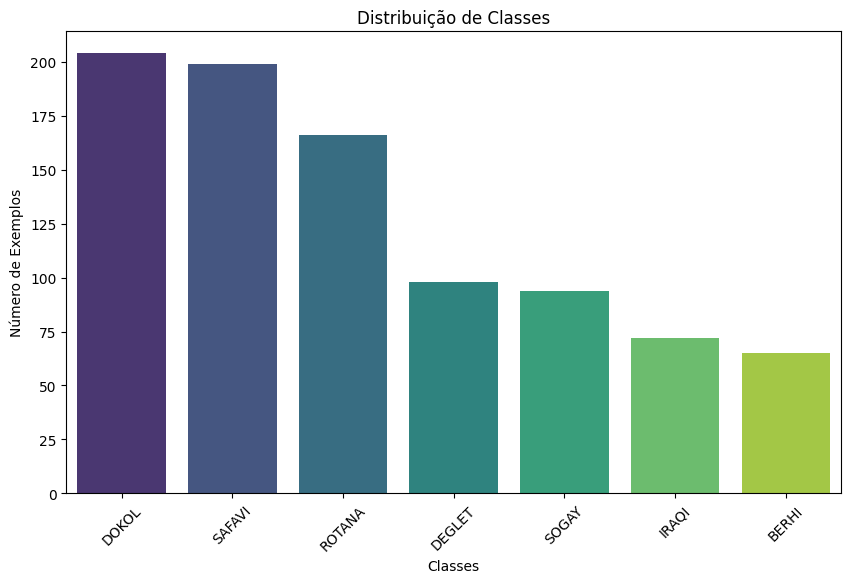


Valores ausentes por coluna:
AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
MeanRR           0
MeanRG           0
MeanRB           0
StdDevRR         0
StdDevRG         0
StdDevRB         0
SkewRR           0
SkewRG           0
SkewRB           0
KurtosisRR       0
KurtosisRG       0
KurtosisRB       0
EntropyRR        0
EntropyRG        0
EntropyRB        0
ALLdaub4RR       0
ALLdaub4RG       0
ALLdaub4RB       0
Class            0
dtype: int64


In [247]:
# Análise exploratória de dados
import matplotlib.pyplot as plt
import seaborn as sns

print("Informações do Dataset:")
print(df.info())
print("\nDescrição Estatística:")
print(df.describe())

print("\nDistribuição de Classes:")
class_counts = df["Class"].value_counts()
print(class_counts)

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Distribuição de Classes")
plt.ylabel("Número de Exemplos")
plt.xlabel("Classes")
plt.xticks(rotation=45)
plt.show()

print("\nValores ausentes por coluna:")
print(df.isnull().sum())

In [248]:
# Separar X e y, converter y, normalizar, dividir em treino/teste e converter para tensores

X = df.drop(columns=["Class"])
y = df["Class"]

le = LabelEncoder()
y = le.fit_transform(y)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)

In [249]:
# Definir uma rede neural com 2 camadas totalmente conectadas, ReLU, Dropout e inicializar o modelo

import torch.nn as nn
import torch.nn.functional as F

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.3)
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x

model = NeuralNet(input_size=X_train.shape[1], hidden_size=64, output_size=len(torch.unique(y_train)))

In [250]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Early Stopping adicionado para tratar Overfitting
patience = 10
best_loss = float('inf')
epochs_no_improve = 0

train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

# Treinamento
epochs = 100
batch_size = 32
train_loader = DataLoader(list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True)

for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    correct = 0
    
    for X_batch, y_batch in train_loader:
        # Forward
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Estatísticas
        epoch_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == y_batch).sum().item()
    
    # Calcular métricas de treinamento
    train_losses.append(epoch_loss)
    train_accuracies.append(correct / len(y_train))
    
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        test_loss = criterion(outputs, y_test).item()
        _, predicted = torch.max(outputs, 1)
        test_accuracy = (predicted == y_test).sum().item() / len(y_test)
        
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
    
    if test_loss < best_loss:
        best_loss = test_loss
        epochs_no_improve = 0
    else:
        epochs_no_improve += 1
        if epochs_no_improve >= patience:
            print("Early stopping triggered")
            break
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {train_accuracies[-1]:.4f}, Test Loss: {test_loss:.4f}, Test Acc: {test_accuracies[-1]:.4f}")

Epoch 1/100, Train Loss: 38.9175, Train Acc: 0.4582, Test Loss: 1.4013, Test Acc: 0.6944
Epoch 2/100, Train Loss: 27.8235, Train Acc: 0.6852, Test Loss: 0.9919, Test Acc: 0.7056
Epoch 3/100, Train Loss: 21.1896, Train Acc: 0.7089, Test Loss: 0.7680, Test Acc: 0.7111
Epoch 4/100, Train Loss: 16.9117, Train Acc: 0.7298, Test Loss: 0.6422, Test Acc: 0.7667
Epoch 5/100, Train Loss: 14.7587, Train Acc: 0.7632, Test Loss: 0.5580, Test Acc: 0.8278
Epoch 6/100, Train Loss: 13.2916, Train Acc: 0.7869, Test Loss: 0.5015, Test Acc: 0.8500
Epoch 7/100, Train Loss: 12.0531, Train Acc: 0.8092, Test Loss: 0.4590, Test Acc: 0.8611
Epoch 8/100, Train Loss: 11.2525, Train Acc: 0.8384, Test Loss: 0.4217, Test Acc: 0.8611
Epoch 9/100, Train Loss: 10.6002, Train Acc: 0.8398, Test Loss: 0.3934, Test Acc: 0.8778
Epoch 10/100, Train Loss: 10.0863, Train Acc: 0.8524, Test Loss: 0.3701, Test Acc: 0.8889
Epoch 11/100, Train Loss: 9.3902, Train Acc: 0.8496, Test Loss: 0.3498, Test Acc: 0.8944
Epoch 12/100, Train 

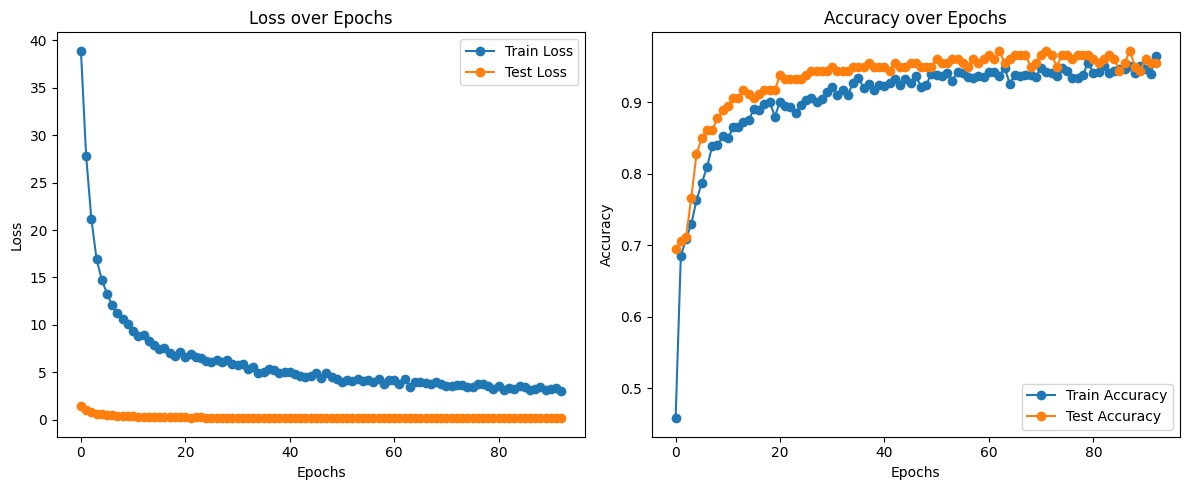

In [251]:
# Plot de graficos para observar Over e Underfit
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss', marker='o')
plt.plot(test_losses, label='Test Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy', marker='o')
plt.plot(test_accuracies, label='Test Accuracy', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Test Accuracy: 0.9556


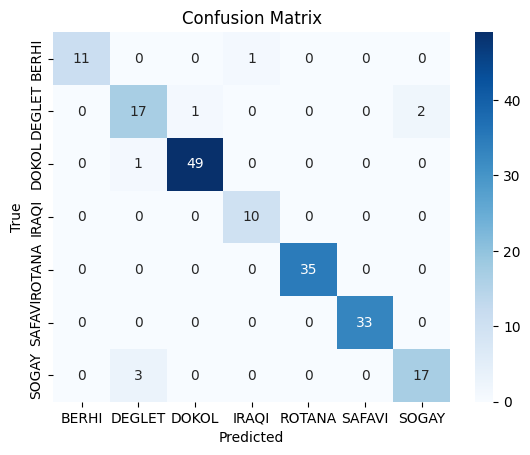

              precision    recall  f1-score   support

       BERHI       1.00      0.92      0.96        12
      DEGLET       0.81      0.85      0.83        20
       DOKOL       0.98      0.98      0.98        50
       IRAQI       0.91      1.00      0.95        10
      ROTANA       1.00      1.00      1.00        35
      SAFAVI       1.00      1.00      1.00        33
       SOGAY       0.89      0.85      0.87        20

    accuracy                           0.96       180
   macro avg       0.94      0.94      0.94       180
weighted avg       0.96      0.96      0.96       180



In [252]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Avaliação no conjunto de teste
model.eval()
with torch.no_grad():
    outputs = model(X_test)
    _, predicted = torch.max(outputs, 1)

test_accuracy = (predicted == y_test).sum().item() / len(y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, predicted, target_names=le.classes_))

O processo começou com a implementação de um pipeline básico de treinamento e avaliação para um modelo de classificação, utilizando PyTorch. Inicialmente, realizamos uma análise exploratória nos dados para verificar a necessidade de tratamentos adicionais, como normalização ou remoção de outliers. No entanto, os dados já estavam preparados e não exigiram intervenções. 


O modelo, composto por uma arquitetura de rede neural simples com três camadas densas, foi configurado para classificar os dados em múltiplas classes utilizando a função de perda CrossEntropyLoss e o otimizador Adam. Durante o treinamento, métricas como perda e acurácia foram coletadas tanto para o conjunto de treinamento quanto para o de teste, permitindo acompanhar a evolução do modelo ao longo das épocas e identificar problemas de desempenho. Essa abordagem forneceu uma base sólida para ajustes e melhorias posteriores.


Refatoramos o treinamento do modelo algumas vezes, devido a enfretar problemas relacionados ao overfitting, e ajustes realizados para garantir um bom desempenho do modelo. 


Inicialmente, enfrentamos sinais claros de overfitting, com a perda no conjunto de treinamento diminuindo drasticamente, enquanto a perda de teste estabilizava ou diminuía de forma mais lenta, indicando que o modelo estava memorizando os dados de treinamento sem generalizar adequadamente para o conjunto de teste. Para mitigar esse problema, aplicamos regularização, como o uso de uma camada de dropout com uma taxa de 0.2, que ajudou a introduzir aleatoriedade no treinamento e evitar que o modelo dependesse excessivamente de algumas conexões. 

Além disso, incorporamos a técnica de early stopping que interrompe quando não há mais melhorias significativas no desempenho no conjunto de teste. Esses ajustes aajuradam a equilibrar as métricas de treinamento e teste, resultando em um modelo que generalizou bem, com acurácia estável e consistente em torno de 92-96% no conjunto de teste. O processo destacou a importância de monitorar constantemente as métricas e ajustar hiperparâmetros e estratégias de regularização para alcançar um modelo robusto e eficaz.